# Preparing CIFTI data for connectivity analysis

CIFTI data refers to surface-level data as e.g. used in the Human Connectome Project (HCP). 

For this tutorial, you will need to create a [BALSA account](https://balsa.wustl.edu/) and then download the data for a single subject first, e.g. by selecting:  
`ConnectomeDB` -> `HCP-Young Adult 2025` -> `Subject group: Single subject` -> `Resting State fMRI 3T Preprocessed Recommended`

*Note: this download will require approximately 10GB of disk space.*

Once downloaded and unpacked, you can load a single CIFTI file. In this case, one resting-state run from the HCP contains 1200 time points and 91282 vertices:

In [7]:
import nibabel as nib

dtseries = nib.load("/home/mibur/hcp2025/100307/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean_rclean_tclean.dtseries.nii")
print(dtseries.shape)

(1200, 91282)


As the data is already cleaned, we do not need to perform further denoising. For parcellation, we can simply use thee `cifti.parcellate()` function which offers commonly used atlasses:

1. Schaefer (cortical only) 100-1000 regions
2. Schaefer (cortical + subcortical) 154-1054 regions
3. Glasser (cortical + subcortical) 379 regions

The following code cell will perform parcellation with Schaefer 200 cortical + 54 subcortical ROIs and then estimates dynamic functional connectivity with the sliding window correlation method:

In [8]:
from comet import cifti, connectivity

ts = cifti.parcellate(dtseries, atlas="schaefer_200_subcortical")

sw = connectivity.SlidingWindow(ts, windowsize=51, shape="gaussian")
dfc = sw.estimate()
print(dfc.shape)

(254, 254, 1150)


Finally, we can plot the resulting estimates at different time points:

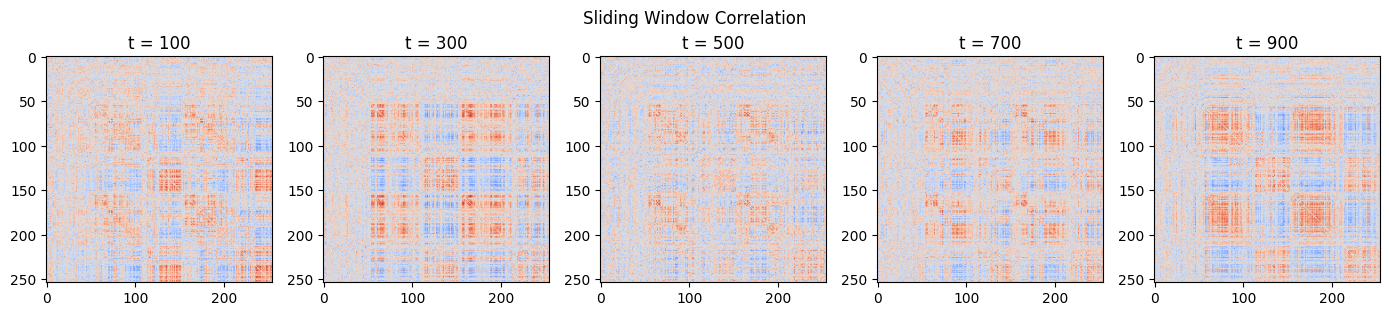

In [9]:
from matplotlib import pyplot as plt

centers = sw.centers() # time points (center of the window) for each estimate

fig, ax = plt.subplots(1, 5, figsize=(14, 3))
fig.suptitle("Sliding Window Correlation")

for i in range(5):
    t = i*200 + 75
    ax[i].set_title(f"t = {centers[t]}")
    ax[i].imshow(dfc[:,:,t], cmap="coolwarm", vmin=-1, vmax=1)

plt.tight_layout()